# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

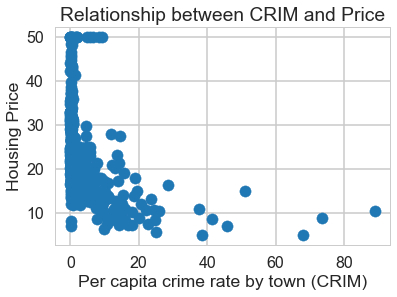

In [12]:
import matplotlib.pyplot as plt
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

**describe relationship**

- The relationship between per capita crime rate and house prices is negative correlated. 
- It has a weak linear relation. 
- Higher house prices are found when crime rate is close to zero and there is higher concentration of house price points for towns with crime rate between 0 and 20 per capita. 
- There are some outliers for crime rate greater than 20.


**scatter plot between *RM* and *PRICE***


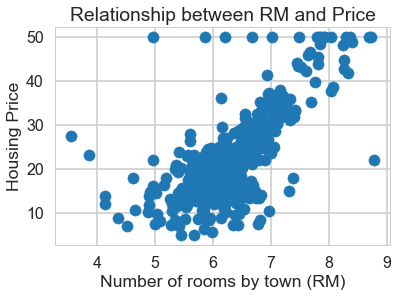

In [13]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Number of rooms by town (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

- There is an aproximate linear relationship (positive) between number of rooms and house prices. 
- There is a concentration of housing price points for number of rooms between 5 and 7.5.



**scatter plot between *PTRATIO* and *PRICE***


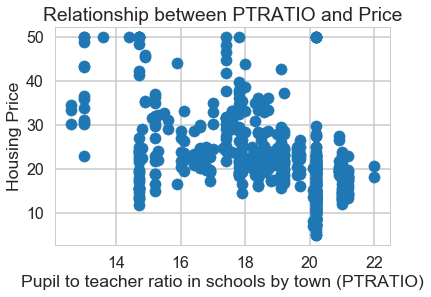

In [14]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil to teacher ratio in schools by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.show()

- There doesn't seem to be a relation between pupil-to-teacher ration and housing prices.



**additional scatter plots**


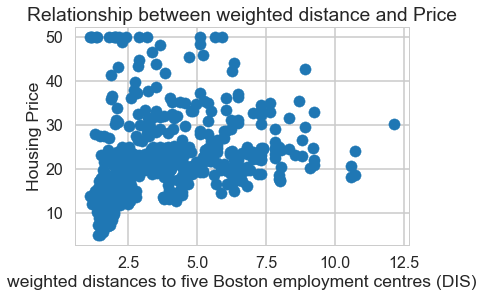

In [15]:
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("weighted distances to five Boston employment centres (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between weighted distance and Price")
plt.show()

- There seems to be a weak positive linear relationship between distance  to 5 Boston employment centers and house prices
- House prices are low for areas closer to the employment centers

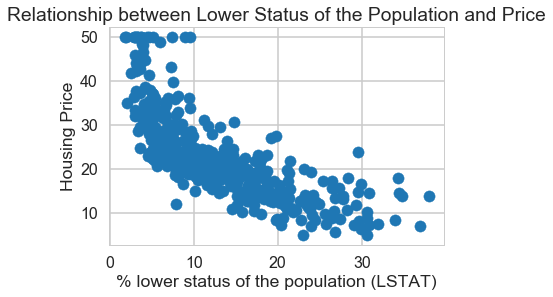

In [16]:
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% lower status of the population (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between Lower Status of the Population and Price")
plt.show()

- There is a negative linear relationship between % lower status of the population and house prices

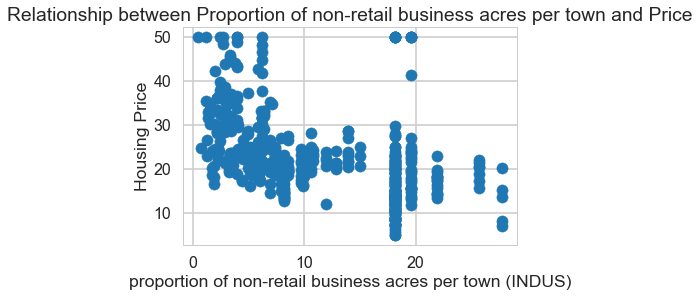

In [17]:
plt.scatter(bos.INDUS, bos.PRICE)
plt.xlabel("proportion of non-retail business acres per town (INDUS)")
plt.ylabel("Housing Price")
plt.title("Relationship between Proportion of non-retail business acres per town and Price")
plt.show()

- There doesn't seem to be a linear correlation between proportion of non-retail business acres per town and house prices
- However, it's important to notice that there is a concentration of higher house prices in towns where the proportion is low (5 or lower), which indicates that prices are higher where there is more retail areas.

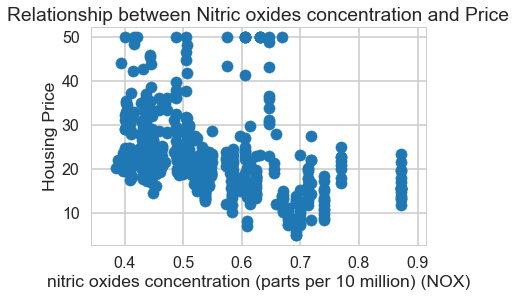

In [18]:
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("nitric oxides concentration (parts per 10 million) (NOX)")
plt.ylabel("Housing Price")
plt.title("Relationship between Nitric oxides concentration and Price")
plt.show()

- There seems to be a negative correlation between nitric oxides concentration and house prices

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

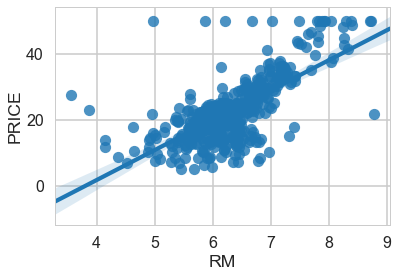

In [19]:
import seaborn as sns
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
plt.show()

### Histograms
***


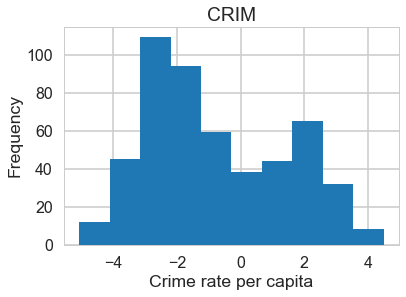

In [20]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

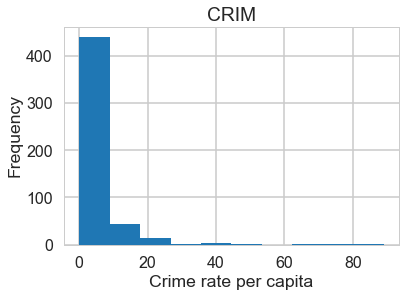

In [21]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()


- The reason for using the log scale in this case is to respond to skewness towards large values. Few points are much larger than the bulk of the data that are concentrated around zero. 
- It's possible to see a frequency peak around crime rate -2 (log) and there are data points around 4 crime rate per capita (log).

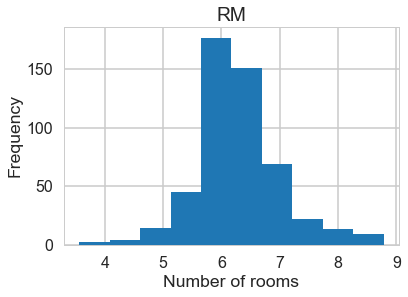

In [22]:
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Number of rooms")
plt.ylabel("Frequency")
plt.show()

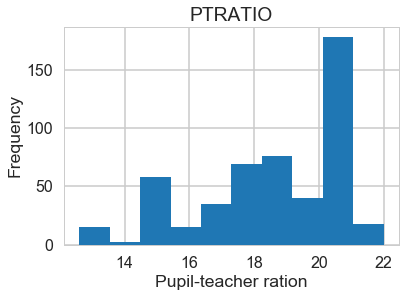

In [23]:
plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("Pupil-teacher ration")
plt.ylabel("Frequency")
plt.show()

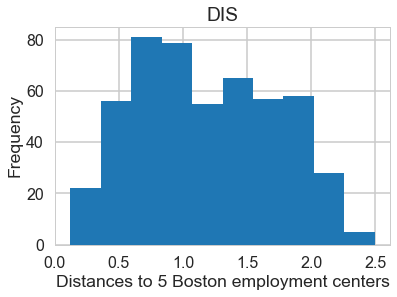

In [24]:
plt.hist(np.log(bos.DIS))
plt.title("DIS")
plt.xlabel("Distances to 5 Boston employment centers")
plt.ylabel("Frequency")
plt.show()


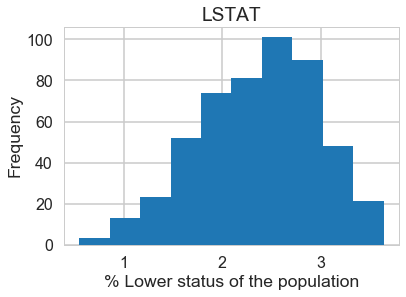

In [25]:
plt.hist(np.log(bos.LSTAT))
plt.title("LSTAT")
plt.xlabel("% Lower status of the population")
plt.ylabel("Frequency")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [26]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/taispancier/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [27]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 29 May 2018   Prob (F-statistic):           2.49e-74
Time:                        21:16:19   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

In [28]:
m.fittedvalues

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
5      23.855940
6      20.051258
7      21.507596
8      16.583355
9      19.978442
10     23.373528
11     20.023952
12     18.931699
13     19.477826
14     20.815836
15     18.431083
16     19.350396
17     19.851012
18     14.990486
19     17.457157
20     16.028126
21     19.623459
22     21.234533
23     18.239939
24     19.250273
25     16.292087
26     18.239939
27     20.369832
28     24.447577
29     26.076855
         ...    
476    24.347454
477    13.606965
478    21.625923
479    22.026416
480    22.144743
481    26.768615
482    29.599371
483    17.775731
484    18.767861
485    22.781891
486    20.979674
487    19.077333
488    14.972282
489    14.608197
490    11.686420
491    19.787297
492    19.787297
493    17.275115
494    19.268477
495    16.938337
496    14.389747
497    18.066999
498    20.114973
499    16.019024
500    20.187790
501    25.339584
502    21.034286
503    28.8256

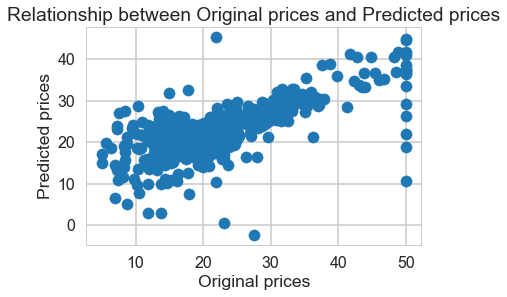

In [29]:
plt.scatter(bos.PRICE, m.fittedvalues)
plt.xlabel("Original prices")
plt.ylabel("Predicted prices")
plt.title("Relationship between Original prices and Predicted prices")
plt.show()

In [30]:
from scipy.stats.stats import pearsonr
r, p_value = pearsonr(bos.PRICE, m.fittedvalues)
r

0.69535994707153936

- There are differences between the actual price and the predicted value
- For the same original price of 50, the model varies the predicted prices.
- There are some outliers (for example, for original price between 20 and 30, there are 2 points close to predicted price zero and one higher than 40).

### Fitting Linear Regression using `sklearn`


In [31]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
X.shape

(506, 13)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [33]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [34]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [35]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 36.4911032804


In [36]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


In [37]:
coef = pd.DataFrame(X.columns)
coef['est_coef'] = lm.coef_
coef

,0,est_coef
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [38]:
# without intercept:

lm_no = LinearRegression(fit_intercept=False)
lm_no.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [39]:
lm_no.intercept_

0.0

In [40]:
coef_no = pd.DataFrame(X.columns)
coef_no['est_coef'] = lm_no.coef_
coef_no

,0,est_coef
0,CRIM,-0.091630
1,ZN,0.048675
2,INDUS,-0.003779
3,CHAS,2.856368
4,NOX,-2.880779
5,RM,5.925214
6,AGE,-0.007224
7,DIS,-0.967995
8,RAD,0.170443
9,TAX,-0.009389


Question to discuss with Andrei: does it make sense not to have intercept? 
Maybe, as it doesn't make sense to have house price when all these variables are zero.


Coefficients must be iid (independently and identically distributed): Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. 
Question to discuss with Andrei: is it enough that they are normally distributed? Do they need to have same standard deviation?

False. Source: http://iovs.arvojournals.org/article.aspx?articleid=2128171
- It is more accurate to check that the errors of a linear regression model are distributed normally or the dependent variable has a conditional normal distribution (rather than if the dependent variable complies fully with a normal distribution) when evaluating whether the “normality assumption” is fulfilled for linear regression. 
- By the law of large numbers and the central limit theorem, 8 the ordinary least squares (OLS) estimators in linear regression technique still will be approximately normally distributed around the true parameter values, which implies the estimated parameters and their confidence interval estimates remain robust. Hence, in a large sample, the use of a linear regression technique, even if the dependent variable violates the “normality assumption” rule, remains valid. 

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [41]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280363404


In [42]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [43]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [44]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

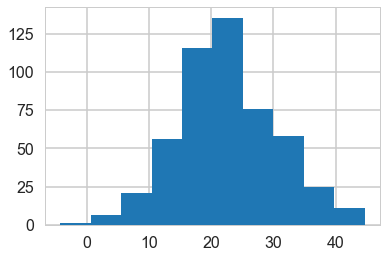

In [45]:
# your turn
plt.hist(lm.predict(X))
plt.show()

In [46]:
lm.predict(X).mean()

22.532806324110677

In [47]:
lm.predict(X).std()

7.9070713249903584

In [48]:
pd.DataFrame(lm.predict(X)).describe()

,0
count,506.000000
mean,22.532806
std,7.914896
min,-4.283009
25%,17.447270
50%,22.120625
75%,27.412587
max,44.673399


The values are approximate normally distributed, with mean at 22.5 and median at 22.1. Prices vary from -4.2 to 44.7.
Negative price should be investigated.

In [52]:
lm.predict(X)[lm.predict(X) < 0]

array([-4.28300934])

In [53]:
X_PRED = X.copy(deep=True)
X_PRED['PRED'] = lm.predict(X)

In [54]:
X_PRED.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRED
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,30.008213
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,25.029861
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,30.570232
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,28.608141
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,27.942882


In [55]:
X_PRED[X_PRED['PRED'] < 0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRED
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,-4.283009


In [56]:
bos.iloc[[414]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0


discuss with Andrei how to handle a case like this

**Linear regression with sklearn with only RM as a feature to compare with statsmodels output:**

In [57]:
lm_rm = LinearRegression()
X1 = bos.RM.values.reshape(-1, 1)
lm_rm.fit(X1, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
lm_rm.intercept_

-34.670620776438568

In [59]:
lm_rm.coef_

array([ 9.10210898])

Same intercept and coefficient using both methods.
- sklearn allows multiple features (does statsmodel offer the same?)
- statsmodel provides a nice output, with more information available at once
- scikit-learn is for machine learning and StatsModels is for complex statistics. https://blog.thedataincubator.com/2017/11/scikit-learn-vs-statsmodels/

Scikit-learn offers a lot of simple, easy to learn algorithms that pretty much only require your data to be organized in the right way before you can run whatever classification, regression, or clustering algorithm you need. The pipelines provided in the system even make the process of transforming your data easier. Of course, choosing a Random Forest or a Ridge still might require understanding the difference between the two models, but scikit-learn has a variety of tools to help you pick the correct models and variables. With a little bit of work, a novice data scientist could have a set of predictions in minutes. 

Though StatsModels doesn’t have this variety of options, it offers statistics and econometric tools that are top of the line and validated against other statistics software like Stata and R. When you need a variety of linear regression models, mixed linear models, regression with discrete dependent variables, and more – StatsModels has options. It also has a syntax much closer to R so, for those who are transitioning to Python, StatsModels is a good choice. **As expected for something coming from the statistics world, there’s an emphasis on understanding the relevant variables and effect size, compared to just finding the model with the best fit.**

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [60]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149868


Discuss with Andrei: Is this number too big or to small? What is the reference for this error?

#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [61]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

8.69056631064e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [62]:
lm_pt = LinearRegression()
X_pt = bos.PTRATIO.values.reshape(-1, 1)
lm_pt.fit(X_pt, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
lm_pt.intercept_

62.344627474832649

In [64]:
lm_pt.coef_

array([-2.1571753])

Intercept: 62.3446 -> indicates that if PTRATIO were zero, the house price would be 62.344
Coef: -2.1571 --> indicates that for each 1 point increase in PTRATIO, the prices decrease by 2.1571 points

In [65]:
# RSS

RSS = np.sum((bos.PRICE - lm_pt.predict(X_pt)) ** 2)
RSS

31702.01320696725

In [66]:
# ESS

ESS = np.sum((lm_pt.predict(X_pt) - np.mean(bos.PRICE)) ** 2)
ESS

11014.282208052502

In [67]:
np.mean(bos.PRICE)

22.532806324110698

In [68]:
TSS = RSS + ESS
TSS

42716.295415019755

In [69]:
R2 = ESS / TSS
R2

0.25784731800922273

In [71]:
m_pt = ols('PRICE ~ PTRATIO',bos).fit()
print(m_pt.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 29 May 2018   Prob (F-statistic):           1.61e-34
Time:                        21:21:44   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

R2 = 0.258 -> indicates that around 26% of the variability in house prices is explained by a linear regression on PTRATIO.
Andrei: is it a high number or low number?

In [72]:
N = bos.shape[0]
K = 1

In [73]:
N

506

In [74]:
F = (R2 / (R2 - 1)) * ((N - K - 1)/K)
F

-175.10554287569519

An F-test in regression compares the fits of different linear models. Unlike t-tests that can assess only one regression coefficient at a time, the F-test can assess multiple coefficients simultaneously.

The F-test of the overall significance is a specific form of the F-test. It compares a model with no predictors to the model that you specify. A regression model that contains no predictors is also known as an intercept-only model.

For simple linear regression, t-test and f-test result in the same result (p ~ 0, indicating that beta 1 is not zero, which means there is some relation between PTRATIO and PRICE.



<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [490]:
# your turn

lm3 = LinearRegression()
X3 = bos.loc[:,('CRIM', 'RM', 'PTRATIO')]
lm3.fit(X3, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [491]:
lm3.intercept_

-3.3066171324064797

In [492]:
lm3.coef_

array([-0.20210971,  7.3815667 , -1.0741868 ])

RM is the variable that impacts house prices prediction the most (for 1 point variation in RM, 7.3815 points variation in house prices). They are positively related.
PTRATIO impacts house prices prediction negatively in a ration of 1: 1.074
CRIM doesn't impact house prices prediction so much (can this be due to different dimensions / scale? Do I need to use regularization? (discuss with Andrei)


In [493]:
m_pt = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m_pt.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sat, 26 May 2018   Prob (F-statistic):           1.09e-97
Time:                        18:47:31   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

Prob F-statistic ~ 0 - at least one of the predictors has a relation with prices

R2 = 0.593

Indicates that around 59% of the variability in house prices is explained by a linear regression on the 3 features.

As p is aproximate zero for the 3 predictors, all of them are associated with the response

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [81]:
m_4_1 = ols('PRICE ~ CRIM + RM + PTRATIO + DIS',bos).fit()
print(m_4_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     182.8
Date:                Tue, 29 May 2018   Prob (F-statistic):           1.83e-96
Time:                        22:02:42   Log-Likelihood:                -1612.5
No. Observations:                 506   AIC:                             3235.
Df Residuals:                     501   BIC:                             3256.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3936      4.081     -0.832      0.4

In [82]:
m_5 = ols('PRICE ~ CRIM + RM + PTRATIO + DIS + LSTAT',bos).fit()
print(m_5.summary())



                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     228.5
Date:                Tue, 29 May 2018   Prob (F-statistic):          1.25e-126
Time:                        22:02:45   Log-Likelihood:                -1539.3
No. Observations:                 506   AIC:                             3091.
Df Residuals:                     500   BIC:                             3116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.9708      4.079      5.632      0.0

In [83]:
m_4_2 = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT',bos).fit()
print(m_4_2.summary())



                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     267.8
Date:                Tue, 29 May 2018   Prob (F-statistic):          6.39e-123
Time:                        22:02:46   Log-Likelihood:                -1550.9
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9939      3.973      4.277      0.0

- CRIM + RM + PTRATIO + LSTAT: has higher F statistic (check with Andrei if the prob of F statist is more important than the value of F statistic)
- CRIM + RM + PTRATIO + DIS + LSTAT: has lower AIC

Andrei: which criteria to consider between AIC and F statistic?


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [84]:
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt


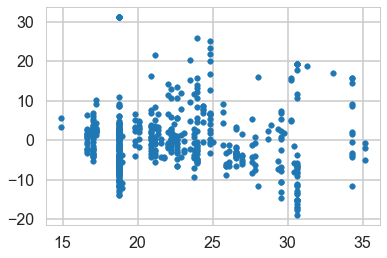

In [91]:
plt.scatter(m_pt.fittedvalues, m_pt.resid, marker='.')
plt.show()

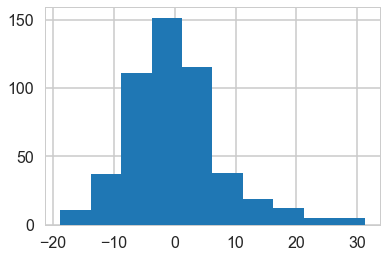

In [103]:
plt.hist(m_pt.resid)
plt.show()

In [104]:
m_pt.resid.mean()

-1.5414985932423912e-14

Assumption of normal distribution for error: this can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
Andrei: how looking at the scatterplot can I say it's normally distributed? It doesn't seem to have a pattern, but is it enough to identify normal distribution in the scatter plot? From the histogram, I would say is approximately normally distributed with some outliers on the right.


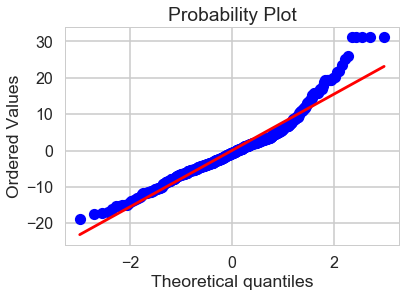

In [92]:
import numpy as np 
import pylab 
import scipy.stats as stats
   
stats.probplot(m_pt.resid, dist="norm", plot=pylab)
pylab.show()

The points fall along a line in the middle of the graph, but curve off in the extremities. This behavior indicate the data have more extreme values than would be expected if they truly came from a Normal distribution.

Andrei: how do I know the quantile from the chart? Are these standard deviations for the normal distribution?

Background:
- A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. By a quantile, we mean the fraction (or percent) of points below the given value. That is, the 0.3 (or 30%) quantile is the point at which 30% percent of the data fall below and 70% fall above that value.
- The x-axis plots the theoretical quantiles. Those are the quantiles from the standard Normal distribution with mean 0 and standard deviation 1.

Andrei: discuss advantages and disadvantages of plots above

Background: 

Outliers: In linear regression, an outlier is an observation with large residual. In other words, it is an observation whose dependent-variable value is unusual given its values on the predictor variables. An outlier may indicate a sample peculiarity or may indicate a data entry error or other problem.

Leverage: An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients.

Influence: An observation is said to be influential if removing the observation substantially changes the estimate of coefficients. Influence can be thought of as the product of leverage and outlierness.

http://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/

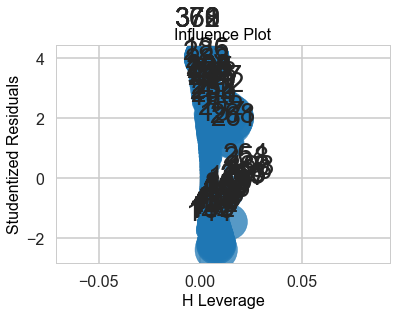

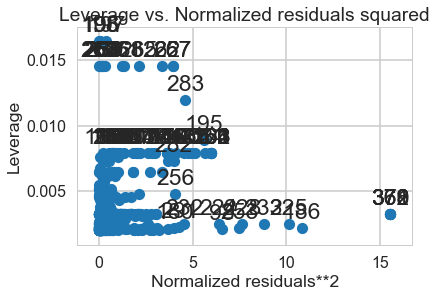

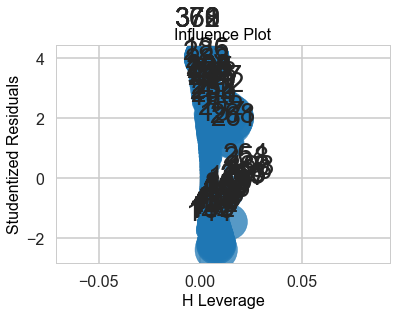

In [130]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(m_pt)
influence_plot(m_pt)

Andrei: due to high volume of points, the charts are messy. How to fix them and how to interpret them.

Andrei: What is the cutoff to remove the outliers and high leverage points? Should I get approximate values from the plot?

**Removing outliers (from dependent variable) and high leverage (from predictors)**

The standard definition for an outlier is a number which is less than Q1 or greater than Q3 by more than 1.5 times the interquartile range ( IQR=Q3−Q1). That is, an outlier is any number less than Q1−(1.5×IQR) or greater than Q3+(1.5×IQR)

In [134]:
bos.PRICE.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [136]:
IQR = 25.000000 - 17.025000
IQR

7.975000000000001

In [137]:
Out_high = 25.000000 + 1.5 * IQR
Out_low = 17.025000 - 1.5 * IQR

In [138]:
Out_high

36.962500000000006

In [139]:
Out_low

5.0624999999999964

In [174]:
bos_out = bos[(bos['PRICE'] > Out_high) | (bos['PRICE'] < Out_low)]
bos_out.PRICE

97     38.7
98     43.8
157    41.3
161    50.0
162    50.0
163    50.0
166    50.0
179    37.2
180    39.8
182    37.9
186    50.0
190    37.0
195    50.0
202    42.3
203    48.5
204    50.0
224    44.8
225    50.0
226    37.6
228    46.7
232    41.7
233    48.3
253    42.8
256    44.0
257    50.0
261    43.1
262    48.8
267    50.0
268    43.5
280    45.4
282    46.0
283    50.0
291    37.3
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
398     5.0
405     5.0
Name: PRICE, dtype: float64

In [149]:
bos_no_out = bos.drop(bos_out.index)
bos_no_out.PRICE

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 466, dtype: float64

In [ ]:
m_no_out = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m_pt.summary())

In [152]:
bos_no_out.CRIM.describe()

count    466.000000
mean       3.568819
std        8.239556
min        0.006320
25%        0.082757
50%        0.247510
75%        3.695990
max       88.976200
Name: CRIM, dtype: float64

In [157]:
IQR_CRIM = bos_no_out.CRIM.quantile(0.75) - bos_no_out.CRIM.quantile(0.25)

Out_high_CRIM = bos_no_out.CRIM.quantile(0.75) + 1.5 * IQR
Out_low_CRIM = bos_no_out.CRIM.quantile(0.25) - 1.5 * IQR

In [158]:
Out_high_CRIM

15.658490000000002

In [159]:
Out_low_CRIM

-11.879742500000003

In [160]:
IQR_RM = bos_no_out.RM.quantile(0.75) - bos_no_out.RM.quantile(0.25)

Out_high_RM = bos_no_out.RM.quantile(0.75) + 1.5 * IQR
Out_low_RM = bos_no_out.RM.quantile(0.25) - 1.5 * IQR

In [161]:
IQR_PTRATIO = bos_no_out.PTRATIO.quantile(0.75) - bos_no_out.PTRATIO.quantile(0.25)

Out_high_PTRATIO = bos_no_out.PTRATIO.quantile(0.75) + 1.5 * IQR
Out_low_PTRATIO = bos_no_out.PTRATIO.quantile(0.25) - 1.5 * IQR

In [169]:
bos_hl = bos_no_out[(((bos_no_out['CRIM'] > Out_high_CRIM) | (bos_no_out['CRIM'] < Out_low_CRIM)) | ((bos_no_out['RM'] > Out_high_RM) | (bos_no_out['RM'] < Out_low_RM)) | ((bos_no_out['PTRATIO'] > Out_high_PTRATIO) | (bos_no_out['PTRATIO'] < Out_low_PTRATIO)))]
bos_hl

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
374,18.4982,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
375,19.6091,0.0,18.1,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,15.0
378,23.6482,0.0,18.1,0.0,0.671,6.380,96.2,1.3861,24.0,666.0,20.2,396.90,23.69,13.1
379,17.8667,0.0,18.1,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78,10.2
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
381,15.8744,0.0,18.1,0.0,0.671,6.545,99.1,1.5192,24.0,666.0,20.2,396.90,21.08,10.9
384,20.0849,0.0,18.1,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8
385,16.8118,0.0,18.1,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81,7.2
386,24.3938,0.0,18.1,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28,10.5
387,22.5971,0.0,18.1,0.0,0.700,5.000,89.5,1.5184,24.0,666.0,20.2,396.90,31.99,7.4


In [184]:
bos_no_out_hl = bos_no_out.drop(bos_hl.index)
bos_no_out_hl.loc[:,('CRIM', 'RM', 'PTRATIO', 'PRICE')].describe()

,CRIM,RM,PTRATIO,PRICE
count,442.000000,442.000000,442.000000,442.000000
mean,2.138314,6.213054,18.531448,21.269683
std,3.711609,0.536813,2.084482,6.119767
min,0.006320,3.561000,12.600000,6.300000
25%,0.079570,5.888000,17.400000,17.400000
50%,0.215640,6.170500,19.000000,21.000000
75%,2.359212,6.515250,20.200000,24.300000
max,15.575700,8.780000,22.000000,36.500000


In [177]:
m_no_out_hl = ols('PRICE ~ CRIM + RM + PTRATIO',bos_no_out_hl).fit()
print(m_no_out_hl.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     183.6
Date:                Sat, 02 Jun 2018   Prob (F-statistic):           4.54e-77
Time:                        21:16:59   Log-Likelihood:                -1247.4
No. Observations:                 442   AIC:                             2503.
Df Residuals:                     438   BIC:                             2519.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8315      3.189      0.888      0.3

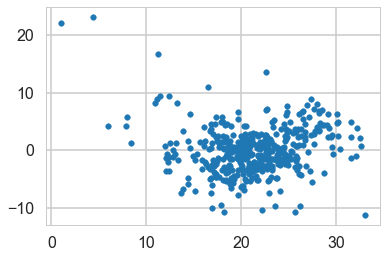

In [178]:
plt.scatter(m_no_out_hl.fittedvalues, m_no_out_hl.resid, marker='.')
plt.show()

In [180]:
m_no_out_hl.resid.describe()

count    4.420000e+02
mean    -2.625954e-14
std      4.073152e+00
min     -1.115922e+01
25%     -2.511498e+00
50%     -1.744976e-01
75%      2.213640e+00
max      2.306176e+01
dtype: float64

In [181]:
m_pt.resid.describe()

count    5.060000e+02
mean    -1.541499e-14
std      7.923147e+00
min     -1.883415e+01
25%     -4.826178e+00
50%     -6.425793e-01
75%      3.157079e+00
max      3.123031e+01
dtype: float64

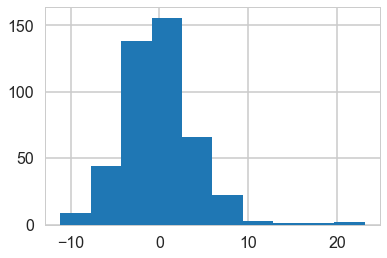

In [193]:
plt.hist(m_no_out_hl.resid)
plt.show()

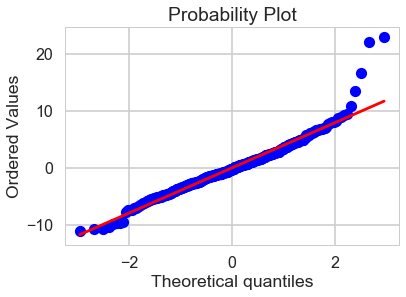

In [194]:
stats.probplot(m_no_out_hl.resid, dist="norm", plot=pylab)
pylab.show()